<a href="https://colab.research.google.com/github/avikbmohan/Presentation_Materials/blob/main/Temple_Talk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction



## About Me

- Hello! My name is Avik Mohan

- I'm a team lead within Data and Analytics Engineering

- Graduated from UCLA in 2017, earning a B.S. in Computer Science, with math and stats specializations

- My team is part of the Analytics Platform engineering group

## About Cigna

- Cigna is a global health service company  
 - Offers health, pharmacy, dental, supplemental insurance and Medicare plans
 - Serves individuals, families, and businesses.

- Stems back to the Insurance Company of North America, formed in 1792
- Recent focus geared towards analytics
- Vested interest in helping people stay healthy

## The Analytics Platform

- The Analytics Platform is designed as a full analytics ecosystem

- Supports things like Python, R, SQL, Web Apps, Dashboards, Scheduling, and more

- Dedicated data storage solutions (Databases, Object Storage)

- Cloud-based infrastructure (AWS)

- My team:
  - Help support various business critical projects
    - Automation
    - Datascience & ML Engineering
    - Data Engineering
    - Infrastructure (Networking, Kubernetes, Databases)
    - Security

## Plan for this talk

- Overview of model timeline, from data generation to reporting results

- Go through examples from real life, to explore some of the concepts from the timeline
  - Each section will be 'self-contained'
  - Focus on real-world value generation

- Discuss a little bit more about my experiences and the daily life at Cigna

## What Is This Notebook?

- This is Google 'Colaboratory'

- Often shortened to 'Colab'

- Basically a free, shareable, cloud-hosted Jupyter notebook

- Going to be using it as my 'powerpoint' and also so we can run code together

In [ ]:
for k in range(3):
  print('*'*66)
for k in range(2):
  print('*'*6, ' '* 52, '*' *6)
for k in range(3):
  print('*'*6, ' '* 4, '*'*18, ' '* 4, '*'*18, ' '* 4, '*'*6)
for k in range(3):
  print('*'*6, ' '* 4, '*'*6, ' '* 4, '*'*6,' '* 4, '*'*6, ' '* 4, '*'*6, ' '* 4, '*'*6)
for k in range(15):
  print(' '*23, '*'* 6, ' '* 4, '*'*6, ' '* 4)
for k in range(3):
  print(' '* 11, '*'*18, ' '* 4, '*'*18, ' '* 4)
for k in range(2):
  print()
for k in range(3):
  print(' '* 11, '*'*42, ' '* 4)

# Model Timeline

- **Data Generation**
  - Claims, Vendors, Hospitals, Doctors, and more

- **Initial Data Storage**
  - Analytics Servers or cloud-based storage

- **Data Cleaning & Maintenance**
  - File format, delimiters, compression, encoding, partitioning, additions, etc.

- **Data 'Presentation'**
  - User-facing database (server w/ storage + compute), authentication & authorization, naming conventions, runaway queries

- **Querying Data**
  - Support Datascientists and Business analysts, as well as enterprise-level jobs

- **Building Models**
  - Having sufficient hardware, memory management, parallelized and distributed computing, correct packages and versions

- **Running Models**
  - Scheduling (time and event-driven), failure logic, storing output data

- **Model Monitoring**
  - Data drift and quality checks, model 'stale'-ness, retraining

- **Reporting Results**
  - Creating and hosting interactive dashboards, managing access

- **Throughout...**
  - Cost considerations, infrastructure maintenance, CICD engineering, version control, site reliability engineering

#### Site Reliability Engineering

" SRE is what you get when you treat operations as if it’s a software problem " - Google

- Managing operations processes through code

- Includes specifying and deploying infrastructure, alarms and notifications, maintaining high availability

# Data Generation

- Data comes from a variety of sources:
  - Claims
  - Vendors
  - Doctors
  - Hospitals

- Crosswalks
  - Help explain what a table contains
  - 'Feature Dictionary' to explain the columns
  - Explain the origin of columns, column restrictions
  - How to interpret special values

- Cigna is in a unique position with the data it possesses


In [ ]:
# Reference [1]
import pandas as pd
import numpy.random as npr
import random
import string

size = 100

# Note the column names
df = pd.DataFrame({'icd_cd': npr.randint(0, 999, size=size),
                   'prgm_cd': [''.join(random.choices(string.ascii_uppercase, k=10))
                         for i in range(size)]} )
df

- The data we deal with is very large in size
  - Hundreds of millions, or billions, of rows
  - Up to one or two thousand columns

- Important to store efficiently

# Initial Data Storage

- "Landing the data"

- Initial storage is likely going to be in the form of some objects
  - Currently, the data is in 'block' storage in memory



In [ ]:
df.to_csv('data.csv')

- Pandas recently added functionality to write directly to S3
  - Note, this requires credentials to be set up
  - Credentials are stored either in:
    - A config file in your home directory
```
      ~/.aws/credentials
```
    - In environment variables
```
os.environ["AWS_ACCESS_KEY_ID"] = "abc123"
os.environ["AWS_SECRET_ACCESS_KEY"] = "xyz456"
```

    

In [ ]:
import os
os.environ

In [ ]:
# pip install fsspec
# pip install s3fs
# df.to_csv('s3://avik-temple-talk/filename')

# Data Cleaning & Maintenance

### Mapping JSON

- Might get JSON data, and have to map it to a relational table

In [ ]:
# Reference [2]
employees = """
{"employees":[  
    {"name":"Avik", "email":"avik17@cigna.com"},  
    {"name":"Mark", "email":"mark32@gmail.com"},  
    {"name":"Alice", "email":"alice87@gmail.com"}  
]}
"""

In [ ]:
import json

data = json.loads(employees)['employees']

In [ ]:
data

In [ ]:
pd.DataFrame(data)

- This however, won't scale to larger datasets.

- We can use AWS Glue to help address this

### Joining Data

- Joining between databases (on-prem to the cloud)
  - Managing memory

- It's extremely useful to know SQL, even if you primarily use another language
  - Many analysts today are using SAS
  - Good to be aware of the different SQL 'flavors'

# Data Presention

After landing, cleaning, and formatting the data, it must be made available to consumers

The following questions come up all the time when understanding where to 'present' data.
- What sort of database do we want to use?
  - OLAP vs OLTP
  - SQL vs NoSQL

- How do we want to deal with user created tables?
  - Lifetime policies
  - Sensitivity checks
  - Access configuration

- What if we're dealing with objects rather than tables?
  - Compression and Encoding
  - File format - how does this affect functionality?

# Querying Data

- Columnar Storage
  - Appropriate for analytics, OLAP databases
  - File format inherently column rather than row based
  - Makes 'Select *' queries very slow, but optimized queries very fast
  
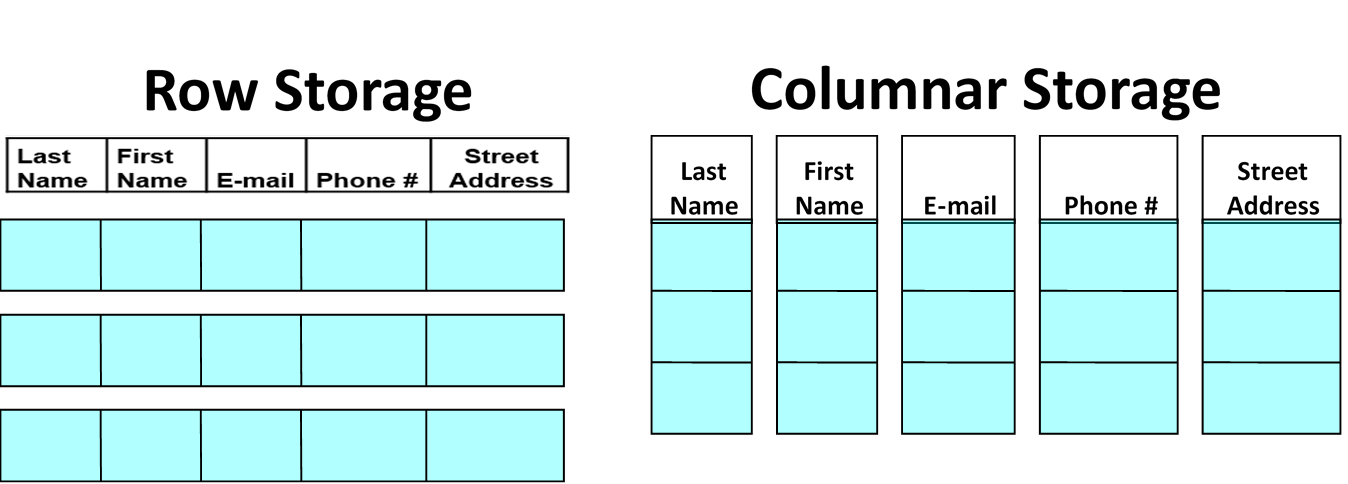

[https://dbmsmusings.blogspot.com/2017/10/apache-arrow-vs-parquet-and-orc-do-we.html]

# Building a Model

## Part 1: Importing packages

 - Example from work: building out spark clusters, making sure they have the right version of things like nmupy

## Part 2: GPU's, Terraform, and Kubernetes

- How do we make GPU's available on the AP?
  - Docker containers, Kubernetes, EKS

In [ ]:
import tensorflow as tf

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
tf.config.list_physical_devices('CPU')

- A note on using GPU's: they help at large scale

## Part 3: Pandas vs Dask vs Koalas vs Spark

- This is a *very* important thing to understand if you'll be working with big data

- Oftentimes, it is *necessary* to leverage one of these tools to run ETL and models realistically.

### Pandas

- The one we know and love

- Runs single-threaded

- Python itself has the Global Interpreter Lock:
https://wiki.python.org/moin/GlobalInterpreterLock
  - "In hindsight, the GIL is not ideal..."

### Dask

- Uses the familar Pandas syntax

- Helps parallelize your code, on a single machine or clusters of thousands of machines

- https://dask.org/

### Koalas

- Uses the familiar Pandas syntax
  - Smallest divergence for datascientists

- Uses Spark in the background for optimization

https://koalas.readthedocs.io/en/latest/index.html

How is Koalas different from Dask?


Different projects have different focuses. Spark is already deployed in virtually every organization, and often is the primary interface to the massive amount of data stored in data lakes. Koalas was inspired by Dask, and aims to make the transition from pandas to Spark easy for data scientists.

### Spark

- Generalized Compute Engine

- Was a project out of UC Berkeley

- A lot of the creators are now part of DataBricks

- Can take the form of PySpark, SparkR, and more

- Builds on the MapReduce paradigm
  - Uses memory rather than disk

### Modin

- Newer, I don't know too much about it, but seems promising

- https://www.kdnuggets.com/2019/11/speed-up-pandas-4x.html

# Running Models

- Internally process built using various AWS and CICD tools
- cron
  - https://crontab.guru
- Event-driven systems
- Failure Logic
  - Step-Functions, DAG's
- Storing output data so that it's presentable (permissions)

# Model Monitoring

- Data drift, model 'stale'-ness
  - MLFlow

- Model Bias testing

- Monitoring of scheduling: failures, alarms, etc

# Reporting Results

- Reporting is extremely important - this is often how management would like to view the data to make decisions upon it.

- Let's run a search for a nice Dash example

In [ ]:
# Reference [3] - https://dash.plotly.com/layout
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True, port=8054)

- That didn't work. Let's search more specifically ( "dash in colab" )

In [ ]:
# Reference [4]
# How to run a Dash app in Google Colab

## Requirements

### Install ngrok
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

### Run ngrok to tunnel Dash app port 8050 to the outside world. 
### This command runs in the background.
get_ipython().system_raw('./ngrok http 8050 &')

### Get the public URL where you can access the Dash app. Copy this URL.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

### Install Dash
!pip install dash==0.31.1  # The core dash backend
!pip install dash-html-components==0.13.2  # HTML components
!pip install dash-core-components==0.39.0  # Supercharged components
!pip install dash-table==3.1.7  # Interactive DataTable component (new!)

In [ ]:
## Dash app (https://dash.plot.ly/getting-started)

### Save file with Dash app on the Google Colab machine
%%writefile my_app1.py
import dash
import dash_core_components as dcc
import dash_html_components as html

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure={
            'data': [
                {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'SF'},
                {'x': [1, 2, 3], 'y': [2, 4, 5], 'type': 'bar', 'name': u'Montréal'},
            ],
            'layout': {
                'title': 'Dash Data Visualization'
            }
        }
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
### Run Dash app
!python my_app1.py

- Stil not working... what now? 

- Revert to matplotlib?

In [ ]:
!pip install jupyter-dash

import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
# Load Data
df = px.data.tips()
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline')

# A Little More on Daily Life as an Analytics Engineer at Cigna

- Meet really great and knowledgeable people

- Work with awesome tools and resources - learn a LOT
  - Agile, program management, real world tools

- See what it takes to really make a change in the world - understand how to really create value

# References

1. https://www.practicaldatascience.org/html/parquet.html

2. https://www.javatpoint.com/json-example

3. https://dash.plotly.com/layout

4. https://stackoverflow.com/questions/53622518/launch-a-dash-app-in-a-google-colab-notebook